In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../policy_training_and_evaluation/estimation/0107_per_time_val_regression_summary.csv') 

In [3]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward,mean_phy_real_info_gains
0,0.938453,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000005,7.534518,-7.534523,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337
1,0.618293,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000562,16.392099,-16.392661,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337
2,7.796385,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,0.001816,40.210571,-40.208755,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337
3,7.102903,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,0.000414,32.287546,-32.287132,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337
4,0.095766,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,0.000588,178.591825,-178.591237,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337


### Test loss & overall reward

In [19]:
df.mean_phy_real_info_gains[0] / df.mean_phy_info_gains[0]

62.67401237207727

In [46]:
df['sum_reward'] = 62.67401237207727 * df['mean_agent_info_gains'] - df['mean_agent_action_costs'] * 5e-4

/h/kingsley/anaconda3/envs/cu90/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


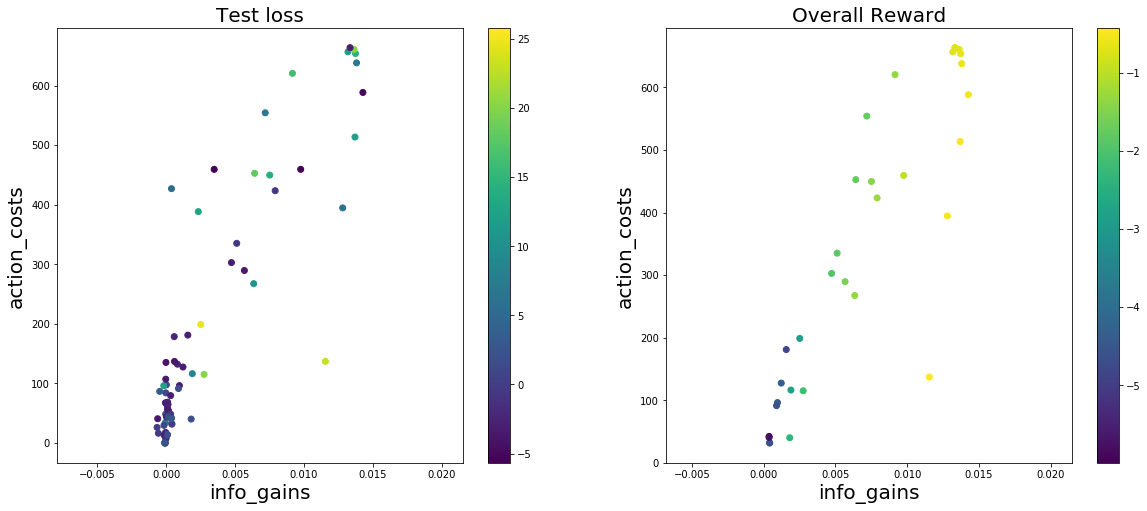

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

def plot_by_color(the_ax, color, title):
    plot1 = the_ax.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], c=color)
    the_ax.set_xlabel('info_gains', fontsize=20)
    the_ax.set_ylabel('action_costs', fontsize=20)
    plt.colorbar(plot1,ax=the_ax)
    the_ax.set_title(title, fontsize=20)

plot_by_color(ax[0], np.log(df['test_loss']), title='Test loss')
plot_by_color(ax[1], np.log(df['sum_reward']), title='Overall Reward')

In [61]:
# Select the point arouod action_costs 588.451 that has low test_loss (convergence) and low overall sum_reward
df.iloc[18, :].policy_dir

'../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-64-lr-0.01-reg-0.01-0.5-s-256-5000-i-50-500-3-1/'

In [66]:
df.sort_values(['sum_reward'], ascending=False).policy_dir.values[:10]

array(['../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-4-1-128-lr-0.01-reg-0.0-0.5-s-256-5000-i-50-500-3-1/',
       '../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-32-lr-0.01-reg-0.0001-0.7-s-256-5000-i-50-500-3-1/',
       '../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-128-lr-0.01-reg-0.0-0.5-s-256-5000-i-50-500-3-1/',
       '../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-64-lr-0.01-reg-0.01-0.5-s-256-5000-i-50-500-3-1/',
       '../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-64-lr-0.01-reg-0.0001-0.5-s-256-5000-i-50-500-3-1/',
       '../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-2-1-256-lr-0.01-reg-0.001-0.7-s-256-5

In [70]:
df.sort_values(['mean_agent_action_costs'], ascending=True).poli

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward,mean_phy_real_info_gains,sum_reward
47,1.372888e+01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000079,0.000000,-0.000079,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.004959
31,1.067571e+01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000079,0.000000,-0.000079,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.004959
29,1.323487e+01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000079,0.000000,-0.000079,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.004959
14,3.024954e+01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000079,0.000000,-0.000079,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.004959
34,3.074150e-01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000070,0.375998,-0.376069,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.004604
30,6.371286e+00,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000101,0.644626,-0.644727,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.006665
0,9.384534e-01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000005,7.534518,-7.534523,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.004097
38,1.794048e-01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000023,7.604682,-7.604705,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.005243
33,5.028612e-02,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000129,12.774084,-12.774212,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.014444
20,6.839468e-01,../models/dqn_mimic-0107_random_order_search-g...,0107_per_time_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,0.000085,13.903092,-13.903007,0.000117,11.219239,-11.219122,0.000055,43.812144,-43.812089,0.007337,-0.001615


### Overall reward is dominated by action cost

In [5]:
selected_df = df[(df['mean_agent_info_gains'] > df['mean_phy_info_gains']) & (df['mean_agent_action_costs'] < df['mean_phy_action_costs']) ]
selected_df

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward,mean_phy_real_info_gains


In [6]:
selected_df['policy_dir'].values

array([], dtype=object)

## Final plot

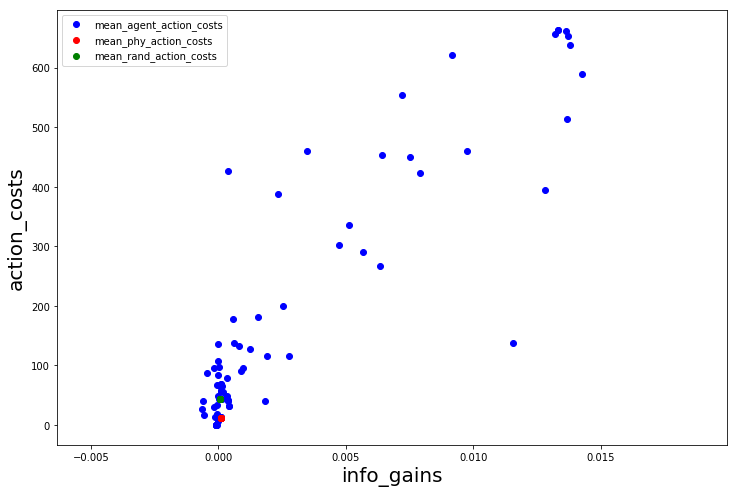

In [7]:
plt.figure(figsize=[12,8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], color='b', )
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()